<a href="https://colab.research.google.com/github/cindiponce2004/bio2110-project-Cindi-P/blob/main/notebooks/updated_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project analyzes flu vaccination rates across different age groups,
racial/ethnic categories and boroughs using NYC immunization data.
The goal is to identify disparities in vaccination coverage among populations.


**Pie chart showing the percentage vaccines per each ethnicity/race**

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [6]:
cd /content/drive/MyDrive/BIO2110 Project/

/content/drive/.shortcut-targets-by-id/1N8UHVLgE4SYsHwpmzxL_C_tJ4T4Gn4uq/BIO2110 Project


In [ ]:
ls

 flu_2022.csv   flu_vaccination_trend.png   Main_Routine_Vaccine_Demo.csv
 flu_2023.csv   immunization_data.csv      'Project charts'
 flu_2024.csv   Location_vaccine_data.csv


In [7]:
df=pd.read_csv("immunization_data.csv")

**Pie chart of the percent of flu vaccines in each race**

In [ ]:
flu_df=df[df["VACCINE_GROUP"] == "Flu"]

In [ ]:
race_vaccinated = (
    flu_df.groupby("RACE_ETHNICITY")["COUNT_PEOPLE_VAC"]
    .sum()
)

KeyError: 'RACE_ETHNICITY'

In [ ]:
race_percent= (race_vaccinated/race_vaccinated.sum()) *100

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.pie(
    race_percent,
    labels=race_percent.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Percent of Flu Vaccinations by Race/Ethnicity")
plt.savefig(group_project_pie_chart.png)
plt.show()

NameError: name 'race_percent' is not defined

**Bar plot: of the amount of vaccines per age group**

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Main_Routine_Vaccine_Demo.csv")

In [ ]:
flu_df=df[df["VACCINE_GROUP"] == "Flu"]

In [ ]:
age_vaccinated = flu_df.groupby("AGE_GROUP")["COUNT_PEOPLE_VAC"].sum()

This extracts only certain age groups

In [ ]:
age_order = ["6 months - 4 years", "5 - 12 years", "13 - 17 years"]

In [ ]:
age_vaccinated_ordered = age_vaccinated.reindex(age_order) #reindex updates an index

Creates bar chart

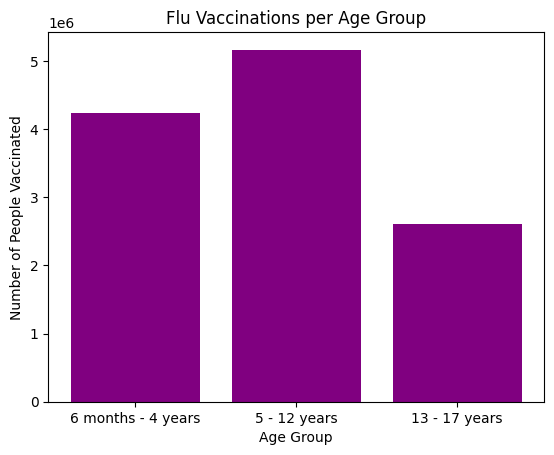

In [ ]:
plt.bar(age_vaccinated_ordered.index, age_vaccinated_ordered.values, color='purple')
plt.xlabel("Age Group")
plt.ylabel("Number of People Vaccinated")
plt.title("Flu Vaccinations per Age Group")
plt.show()

Flu Vaccination Rates By Borough Overtime

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    "flu_2022.csv",
    "flu_2023.csv",
    "flu_2024.csv"
]

dfs = [pd.read_csv(file) for file in files]

Divides each neighborhood by borough

In [ ]:
neighborhood_to_borough = {

    "Chelsea/NoMad/West Chelsea": "Manhattan",
    "Chinatown/Lower East Side": "Manhattan",
    "East Village/Gramercy/Greenwich Village": "Manhattan",
    "Financial District": "Manhattan",
    "Harlem": "Manhattan",
    "Upper East Side": "Manhattan",
    "Upper West Side": "Manhattan",

    "Bedford Stuyvesant": "Brooklyn",
    "Bushwick": "Brooklyn",
    "Crown Heights": "Brooklyn",
    "Sunset Park": "Brooklyn",

    "Astoria": "Queens",
    "Flushing": "Queens",
    "Jamaica": "Queens",
    "Long Island City": "Queens",

    "Central Bronx": "Bronx",
    "North Bronx": "Bronx",
    "South Bronx": "Bronx",

   "Silver Lake/St. George": "Staten Island",
    "Elm Park": "Staten Island",
    "Graniteville/Mariner's Harbor/Port Ivory": "Staten Island",
    "New Dorp/Todt Hill": "Staten Island",
    "Arrochar/Midland Beach/Shore Acres/South Beach Ocean Breeze": "Staten Island",
    "Lighthouse Hill/Midland Beach/New Dorp/Oakwood": "Staten Island",
    "Tottenville": "Staten Island",
    "Great Kills": "Staten Island",
    "Charleston/Prince's Bay/Woodrow": "Staten Island",
    "Port Richmond/Randall Manor/West Brighton": "Staten Island",
    "Annadale/Rossville": "Staten Island",
    "Bloomfield/Freshkills Park": "Staten Island"
}

In [ ]:
borough_years = []

for df in dfs:
    df["Borough"] = df["NEIGHBORHOOD_NAME"].map(neighborhood_to_borough)

    borough_summary = (
        df.groupby("Borough")["PERC_VAC"]
        .mean()
        .reset_index()
    )

    borough_summary["Year"] = df["YEAR_COVERAGE"].iloc[0]
    borough_years.append(borough_summary)

In [ ]:
final_df = pd.concat(borough_years)

In [ ]:
plot_df = final_df.pivot(index="Year", columns="Borough", values="PERC_VAC")

Creates a line plot

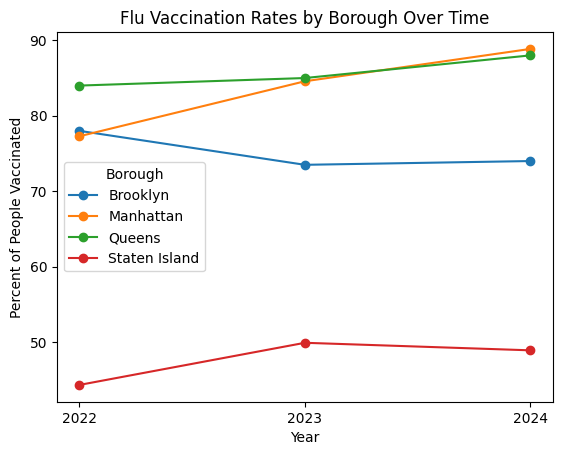

In [ ]:
plot_df.plot(marker="o")

plt.xlabel("Year")
plt.ylabel("Percent of People Vaccinated")
plt.title("Flu Vaccination Rates by Borough Over Time")
plt.legend(title="Borough")
plt.xticks([2022, 2023, 2024])
plt.show()

Vaccination rates of race/ethnicities and Age
groups

In [ ]:
df = pd.read_csv("immunization_data.csv")


columns_needed = ["AGE_GROUP", "YEAR_COVERAGE", "RACE_ETHNICITY", "COUNT_PEOPLE_VAC", "POP_DENOMINATOR"]
df_subset = df[columns_needed].copy()


df_subset["percent_vaccinated"] = (df_subset["COUNT_PEOPLE_VAC"] / df_subset["POP_DENOMINATOR"]) * 100

summary = df_subset.groupby(["AGE_GROUP", "RACE_ETHNICITY", "YEAR_COVERAGE"]).agg(
    total_vaccinated=("COUNT_PEOPLE_VAC", "sum"),
    total_population=("POP_DENOMINATOR", "sum")
).reset_index()

summary["percent_vaccinated"] = (summary["total_vaccinated"] / summary["total_population"]) * 100
print (summary)


              AGE_GROUP                 RACE_ETHNICITY YEAR_COVERAGE  \
0         13 - 17 years  American Indian, non-Hispanic     2016 - 17   
1         13 - 17 years  American Indian, non-Hispanic          2017   
2         13 - 17 years  American Indian, non-Hispanic     2017 - 18   
3         13 - 17 years  American Indian, non-Hispanic          2018   
4         13 - 17 years  American Indian, non-Hispanic     2018 - 19   
..                  ...                            ...           ...   
481  6 months - 4 years            White, non-Hispanic     2020 - 21   
482  6 months - 4 years            White, non-Hispanic     2021 - 22   
483  6 months - 4 years            White, non-Hispanic     2022 - 23   
484  6 months - 4 years            White, non-Hispanic     2023 - 24   
485  6 months - 4 years            White, non-Hispanic     2024 - 25   

     total_vaccinated  total_population  percent_vaccinated  
0               835.0           1697.23           49.197811  
1          

Creates the bar chart in order from youngetst to oldest.

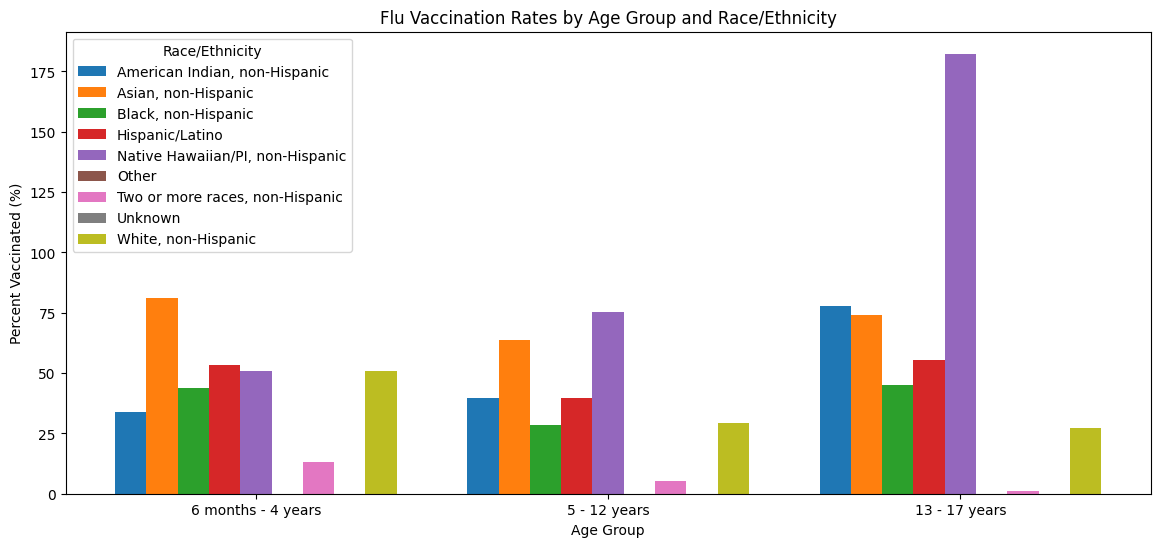

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


age_groups = summary["AGE_GROUP"].unique()

ethnicities = sorted(summary["RACE_ETHNICITY"].unique())
n_age=len(age_groups)
n_eth =len(ethnicities)

total_width = 0.8

bar_width = total_width / n_eth
x = np.arange(n_age)

plt.figure(figsize=(14,6))


for i, ethnicity in enumerate(ethnicities):        # enumerate is used to use index and the value of items in a list.
    values = []
    for age in age_groups:

        val = summary[(summary["AGE_GROUP"] == age) &
                      (summary["RACE_ETHNICITY"] == ethnicity)]["percent_vaccinated"].mean()
        values.append(val)

    plt.bar(x - total_width/2 + i*bar_width + bar_width/2, values, width=bar_width, label=ethnicity)



plt.xlabel("Age Group")
plt.ylabel("Percent Vaccinated (%)")
plt.title("Flu Vaccination Rates by Age Group and Race/Ethnicity")
plt.xticks(x, age_groups)
plt.legend(title="Race/Ethnicity")
plt.show()

Trend of Flu Vaccination Rates Over Time

In [ ]:
df = pd.read_csv("immunization_data.csv")

In [ ]:
import pandas as pd

df = pd.read_csv("/content/immunization_data.csv")

flu_df = df[df["VACCINE_GROUP"].astype(str).str.lower().str.contains("flu")].copy()

print("Rows in flu_df:", len(flu_df))
print("\nSample YEAR_COVERAGE values:")
print(flu_df["YEAR_COVERAGE"].dropna().astype(str).head(10).to_list())

print("\nSample PERC_VAC values:")
print(flu_df["PERC_VAC"].head(10).to_list())

Rows in flu_df: 459

Sample YEAR_COVERAGE values:
['2024 - 25', '2024 - 25', '2024 - 25', '2024 - 25', '2024 - 25', '2024 - 25', '2024 - 25', '2024 - 25', '2024 - 25', '2024 - 25']

Sample PERC_VAC values:
[54.0, 87.0, 50.0, 61.0, 67.0, nan, 12.0, nan, 57.0, 24.0]


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("immunization_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'immunization_data.csv'

In [ ]:
flu_df = df[df["VACCINE_GROUP"].astype(str).str.lower().str.contains("flu")].copy()

In [ ]:
flu_df["PERC_VAC"] = pd.to_numeric(flu_df["PERC_VAC"], errors="coerce")

In [ ]:
flu_df["YEAR"] = (
    flu_df["YEAR_COVERAGE"]
    .astype(str)
    .str.extract(r"(\d{4})")[0]
)
flu_df["YEAR"] = pd.to_numeric(flu_df["YEAR"], errors="coerce")

In [ ]:
flu_df = flu_df.dropna(subset=["YEAR", "PERC_VAC"])
print("Rows after cleaning:", len(flu_df))
yearly_avg = flu_df.groupby("YEAR")["PERC_VAC"].mean().sort_index()

Rows after cleaning: 357


In [ ]:
print("\nYearly averages:")
print(yearly_avg)


Yearly averages:
YEAR
2016    41.571429
2017    39.714286
2018    43.142857
2019    45.285714
2020    45.880952
2021    42.833333
2022    42.642857
2023    40.619048
2024    38.928571
Name: PERC_VAC, dtype: float64


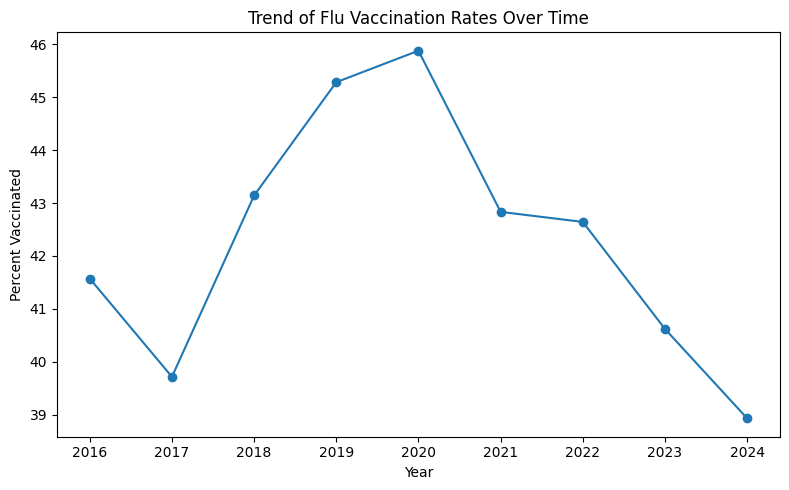

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(yearly_avg.index, yearly_avg.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Percent Vaccinated")
plt.title("Trend of Flu Vaccination Rates Over Time")
plt.tight_layout()
plt.show()
plt.savefig("flu_vaccination_trend.png", dpi=300, bbox_inches="tight")

**Heat map: Flu vaccination rate by borough with age**

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("flu_2024.csv")

Divides Neighborhoods by borough

In [ ]:
neighborhood_to_borough = {

    "Chelsea/NoMad/West Chelsea": "Manhattan",
    "Chinatown/Lower East Side": "Manhattan",
    "East Village/Gramercy/Greenwich Village": "Manhattan",
    "Financial District": "Manhattan",
    "Harlem": "Manhattan",
    "Upper East Side": "Manhattan",
    "Upper West Side": "Manhattan",

    "Bedford Stuyvesant": "Brooklyn",
    "Bushwick": "Brooklyn",
    "Crown Heights": "Brooklyn",
    "Sunset Park": "Brooklyn",

    "Astoria": "Queens",
    "Flushing": "Queens",
    "Jamaica": "Queens",
    "Long Island City": "Queens",

    "Central Bronx": "Bronx",
    "North Bronx": "Bronx",
    "South Bronx": "Bronx",

   "Silver Lake/St. George": "Staten Island",
    "Elm Park": "Staten Island",
    "Graniteville/Mariner's Harbor/Port Ivory": "Staten Island",
    "New Dorp/Todt Hill": "Staten Island",
    "Arrochar/Midland Beach/Shore Acres/South Beach Ocean Breeze": "Staten Island",
    "Lighthouse Hill/Midland Beach/New Dorp/Oakwood": "Staten Island",
    "Tottenville": "Staten Island",
    "Great Kills": "Staten Island",
    "Charleston/Prince's Bay/Woodrow": "Staten Island",
    "Port Richmond/Randall Manor/West Brighton": "Staten Island",
    "Annadale/Rossville": "Staten Island",
    "Bloomfield/Freshkills Park": "Staten Island"
}

In [ ]:
df["BOROUGH"] = df["NEIGHBORHOOD_NAME"].map(neighborhood_to_borough)

Creates the histogram by year

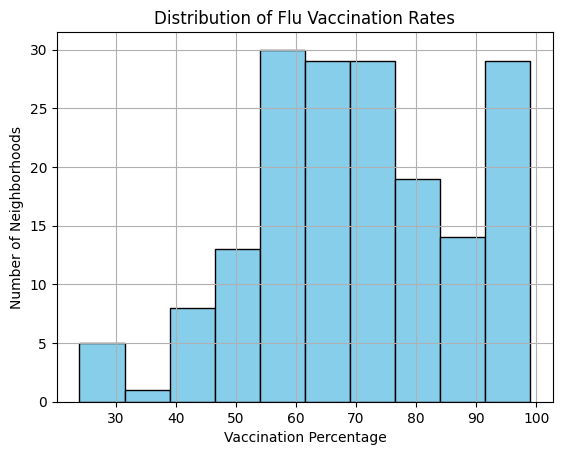

In [ ]:
plt.hist(df["PERC_VAC"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Vaccination Percentage")
plt.ylabel("Number of Neighborhoods")
plt.title("Distribution of Flu Vaccination Rates")
plt.grid(True)
plt.savefig("flu_vaccination_histogram.png")
plt.show()

Summary of the entire file

In [10]:
import pandas as pd

# Load datad
df = pd.read_csv("immunization_data.csv")

# 1. Overall summary

overall_summary = pd.DataFrame({
    "total_vaccinated": [df["COUNT_PEOPLE_VAC"].sum()],
    "total_population": [df["POP_DENOMINATOR"].sum()],
    "percent_vaccinated": [
        (df["COUNT_PEOPLE_VAC"].sum() / df["POP_DENOMINATOR"].sum()) * 100
    ]
})


# 2. Summary by age group

age_summary = df.groupby("AGE_GROUP").agg(
    total_vaccinated=("COUNT_PEOPLE_VAC", "sum"),
    total_population=("POP_DENOMINATOR", "sum")
).reset_index()

age_summary["percent_vaccinated"] = (
    age_summary["total_vaccinated"] / age_summary["total_population"]
) * 100


# 3. Summary by race/ethnicity

ethnicity_summary = df.groupby("RACE_ETHNICITY").agg(
    total_vaccinated=("COUNT_PEOPLE_VAC", "sum"),
    total_population=("POP_DENOMINATOR", "sum")
).reset_index()

ethnicity_summary["percent_vaccinated"] = (
    ethnicity_summary["total_vaccinated"] / ethnicity_summary["total_population"]
) * 100

# 4. Summary by year

year_summary = df.groupby("YEAR_COVERAGE").agg(
    total_vaccinated=("COUNT_PEOPLE_VAC", "sum"),
    total_population=("POP_DENOMINATOR", "sum")
).reset_index()

year_summary["percent_vaccinated"] = (
    year_summary["total_vaccinated"] / year_summary["total_population"]
) * 100


# 5. Summary by vaccine group

vaccine_summary = df.groupby("VACCINE_GROUP").agg(
    total_vaccinated=("COUNT_PEOPLE_VAC", "sum"),
    total_population=("POP_DENOMINATOR", "sum")
).reset_index()

vaccine_summary["percent_vaccinated"] = (
    vaccine_summary["total_vaccinated"] / vaccine_summary["total_population"]
) * 100


In [11]:
overall_summary
age_summary
ethnicity_summary
year_summary
vaccine_summary


,VACCINE_GROUP,total_vaccinated,total_population,percent_vaccinated
0,4313314,1027444.0,1700713.60,60.412523
1,DTaP,1252931.0,1700713.60,73.670899
2,Flu,12013311.0,28302772.57,42.445704
3,HPV,6296791.0,9270387.33,67.923710
4,HepB,1489195.0,1700713.60,87.562950
5,Hib,1234396.0,1700713.60,72.581062
6,MMR,1503037.0,1700713.60,88.376844
7,PCV,1171479.0,1700713.60,68.881615
8,Polio,1532025.0,1700713.60,90.081305
9,Varicella,1486756.0,1700713.60,87.419540
